**Data Preprocessing for Market Direction Prediction**(Needs changes)


This Kaggle notebook focuses on the preprocessing steps required for training a predictive model to forecast market direction (Up or Down) at various time frames using tick data.

**Summary:**
1. **Data Loading and Transformation:**
   - Loaded tick data from a CSV file, containing essential columns like 'askPrice,' 'bidPrice,' 'askVolume,' 'bidVolume,' 'time,' 'year,' 'month,' and 'day.'
   - Converted the 'date' or timestamp columns to datetime format for time-based analysis.
   - Created additional features, such as 'year,' 'month,' and 'day,' to facilitate time-based grouping and analysis.

2. **Time Series Features and Labels:**
   - Derived time-related features such as 'year,' 'month,' and 'day' for temporal context.
   - Calculated price changes over different time intervals (3 months, 6 months, 9 months).
   - Generated labels for price direction (Up/Down) based on the calculated price changes.

3. **Volatility and Trend Duration:**
   - Calculated volatility metrics (high and low) for each time interval.
   - Determined trend duration for the given time intervals, aiding in identifying prolonged market trends.

4. **Technical Indicators:**
   - Computed technical indicators like RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence), ADX (Average Directional Index), Stochastic Oscillator, MFI (Money Flow Index), ROC (Rate of Change), ULTOSC (Ultimate Oscillator), CCI (Commodity Channel Index), BOP (Balance of Power), and CMO (Chande Momentum Oscillator).
   - Applied various time intervals (15 minutes, 30 minutes, 60 minutes, 240 minutes, 480 minutes) to capture different aspects of market dynamics.

5. **Data Transformation for Model Training:**
   - Transformed the dataset by incorporating calculated features and labels, creating a comprehensive dataset for model training.
   - Saved the preprocessed dataset with new features and labels to a CSV file.


This notebook prepares the tick data for training a predictive model to forecast market direction in multiple time frames. The inclusion of diverse technical indicators and time-related features enhances the dataset's richness, providing a solid foundation for training robust prediction models.



In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/datessss/D1_with_dates.csv')

# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the day, month, and year into separate columns
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Drop the original 'timestamp' column
data = data.drop(columns=['timestamp'])

# Save the modified dataset
data.to_csv('/kaggle/working/D1_with_dates_modified.csv', index=False)


In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/modified/D1_with_dates_modified.csv')

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Save the modified dataset to the specified path
data.to_csv('/kaggle/working/D1_01.csv', index=False)


In [12]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/modified/D1_with_dates_modified.csv')

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = (data['high'] - data['close']).round(5)
data['Volatility_Low'] = (data['close'] - data['low']).round(5)

# Save the modified dataset to the specified path
data.to_csv('/kaggle/working/D1_01.csv', index=False)


In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0222/D1_01.csv', sep='\t')

# Split the concatenated column into separate columns
data[['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low']] = data.iloc[:, 0].str.split(',', expand=True)

# Convert relevant columns to numeric (if needed)
data['close'] = pd.to_numeric(data['close'])
data['high'] = pd.to_numeric(data['high'])
data['low'] = pd.to_numeric(data['low'])

# Calculate Price_Up
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate Volatility_High and Volatility_Low
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Create Trend_Duration 
data['Trend_Duration'] = pd.cut(data['day'].astype(int), bins=[1, 5, 20, float('inf')],
                                labels=['Short-Term Trend (1-5 days)',
                                        'Medium-Term Trend (6-20 days)',
                                        'Long-Term Trend (>20 days)'])

# Save the modified dataset
data.to_csv('/kaggle/working/D1_02.csv', index=False)


In [14]:
data = pd.read_csv('/kaggle/input/d1-0222/D1_01.csv', sep='\t')
print(data.columns)


Index(['open,high,low,close,volume,day,month,year,Price_Up,Volatility_High,Volatility_Low'], dtype='object')


In [15]:
import pandas as pd

# Load the dataset with a comma separator
data = pd.read_csv('/kaggle/input/d1-0222/D1_01.csv')

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Clean column names by removing leading/trailing whitespaces
data.columns = data.columns.str.strip()

# Create a new column "Trend_Duration" based on your criteria

data['Trend_Duration'] = pd.cut(data['day'], bins=[1, 5, 20, float('inf')],
                                labels=['Short-Term Trend (1-5 days)',
                                        'Medium-Term Trend (6-20 days)',
                                        'Long-Term Trend (>20 days)'])

# Save the modified dataset to the specified path
data.to_csv('/kaggle/working/D1_03.csv', index=False)


In [16]:
print(data.columns)


Index(['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year',
       'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration'],
      dtype='object')


In [17]:
pip install TA-Lib


  Using cached TA-Lib-0.4.28.tar.gz (357 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      <string>:77: UserWarning: Cannot find ta-lib library, installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating build/lib.linux-x86_64-cpython-310/talib
      copying talib/abstract.py -> build/lib.linux-x86_64-cpython-310/talib
      copying talib/__init__.py -> build/lib.linux-x86_64-cpython-310/talib
      copying talib/stream.py -> build/lib.linux-x86_64-cpython-310/talib
      copying talib/deprecated.py -> build/lib.linux-x86_64-cpython-310/talib
      running build_ext
      buildi

In [18]:
import pandas as pd
import talib

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Clean column names by removing leading/trailing whitespaces
data.columns = data.columns.str.strip()

# Calculate RSI (Relative Strength Index)
rsi_period = 14
data['RSI'] = talib.RSI(data['close'], timeperiod=rsi_period)

# Calculate MACD (Moving Average Convergence Divergence)
data['MACD'], data['Signal_Line'], _ = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Calculate ADX (Average Directional Index)
data['ADX'] = talib.ADX(data['high'], data['low'], data['close'], timeperiod=14)

# Calculate Stochastic Oscillator
data['%K'], data['%D'] = talib.STOCH(data['high'], data['low'], data['close'], fastk_period=5, slowk_period=3, slowd_period=3)

# Calculate MFI (Money Flow Index)
data['MFI'] = talib.MFI(data['high'], data['low'], data['close'], data['volume'], timeperiod=14)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = talib.ROC(data['close'], timeperiod=roc_period)

# Calculate Ultimate Oscillator (ULTOSC)
data['ULTOSC'] = talib.ULTOSC(data['high'], data['low'], data['close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)

# Calculate CCI (Commodity Channel Index)
data['CCI'] = talib.CCI(data['high'], data['low'], data['close'], timeperiod=14)

# Calculate BOP (Balance of Power)
data['BOP'] = talib.BOP(data['open'], data['high'], data['low'], data['close'])

# Calculate CMO (Chande Momentum Oscillator)
data['CMO'] = talib.CMO(data['close'], timeperiod=14)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/D1_04.csv', index=False)


ModuleNotFoundError: No module named 'talib'

In [ ]:
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')
print

In [ ]:
import pandas as pd
import pandas_ta as ta

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')

# Manually specify the column names
column_names = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Split the concatenated column into separate columns
data[column_names] = data.iloc[:, 0].str.split('\t', expand=True)

# Clean column names by removing leading/trailing whitespaces
data.columns = data.columns.str.strip()

# Calculate the Price_Up column
data['Price_Up'] = (data['close'].astype(float) < data['close'].shift(-1).astype(float)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'].astype(float) - data['close'].astype(float)
data['Volatility_Low'] = data['close'].astype(float) - data['low'].astype(float)

# Calculate RSI (Relative Strength Index)
data.ta.rsi(length=14, append=True)

# Calculate MACD (Moving Average Convergence Divergence)
data.ta.macd(fast=12, slow=26, signal=9, append=True)

# Calculate ADX (Average Directional Index)
data.ta.adx(length=14, append=True)

# Calculate Stochastic Oscillator
data.ta.stoch(fastk=5, fastd=3, append=True)

# Calculate MFI (Money Flow Index)
data.ta.mfi(length=14, append=True)

# Calculate ROC (Rate of Change)
data.ta.roc(length=12, append=True)

# Calculate Ultimate Oscillator (ULTOSC)
data.ta.ultosc(slow=7, medium=14, fast=28, append=True)

# Calculate CCI (Commodity Channel Index)
data.ta.cci(length=14, append=True)

# Calculate BOP (Balance of Power)
data.ta.bop(append=True)

# Calculate CMO (Chande Momentum Oscillator)
data.ta.cmo(length=14, append=True)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/D1_04.csv', index=False)


In [ ]:
import pandas as pd
import pandas_ta as ta

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')

# Split the concatenated column into separate columns
split_data = data.iloc[:, 0].str.split('\t', expand=True)

# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Concatenate the split data with the original data
data = pd.concat([data, split_data], axis=1)

# Clean column names by removing leading/trailing whitespaces
data.columns = data.columns.str.strip()

# Calculate the Price_Up column
data['Price_Up'] = (data['close'].astype(float) < data['close'].shift(-1).astype(float)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'].astype(float) - data['close'].astype(float)
data['Volatility_Low'] = data['close'].astype(float) - data['low'].astype(float)

# Calculate technical indicators using pandas_ta
data.ta.rsi(length=14, append=True)
data.ta.macd(fast=12, slow=26, signal=9, append=True)
data.ta.adx(length=14, append=True)
data.ta.stoch(fastk=5, fastd=3, append=True)
data.ta.mfi(length=14, append=True)
data.ta.roc(length=12, append=True)
data.ta.ultosc(slow=7, medium=14, fast=28, append=True)
data.ta.cci(length=14, append=True)
data.ta.bop(append=True)
data.ta.cmo(length=14, append=True)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/D1_04.csv', index=False)


In [ ]:

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')
# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low']


In [ ]:
# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')

# Split the concatenated column into separate columns
split_data = data.iloc[:, 0].str.split(',', expand=True)

# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Concatenate the split data with the original data
data = pd.concat([data, split_data], axis=1)


data.to_csv('/kaggle/working/D1_04.csv', index=False)

In [ ]:
import pandas as pd

from pandas_ts import TimeSeriesDataFrame

# Load the dataset
data = TimeSeriesDataFrame.read_csv('/kaggle/input/d1-044/D1_04.csv', sep='\t')

# Split the concatenated column into separate columns
split_data = data.iloc[:, 0].str.split(',', expand=True)

# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Concatenate the split data with the original data
data = pd.concat([data, split_data], axis=1)

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Clean column names by removing whitespaces
data.columns = data.columns.str.strip()

# Calculate RSI (Relative Strength Index)
rsi_period = 14
data['RSI'] = talib.RSI(data['close'], timeperiod=rsi_period)

# Calculate MACD (Moving Average Convergence Divergence)
data['MACD'], data['Signal_Line'], _ = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Calculate ADX (Average Directional Index)
data['ADX'] = talib.ADX(data['high'], data['low'], data['close'], timeperiod=14)

# Calculate Stochastic Oscillator
data['%K'], data['%D'] = talib.STOCH(data['high'], data['low'], data['close'], fastk_period=5, slowk_period=3, slowd_period=3)

# Calculate MFI (Money Flow Index)
data['MFI'] = talib.MFI(data['high'], data['low'], data['close'], data['volume'], timeperiod=14)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = talib.ROC(data['close'], timeperiod=roc_period)

# Calculate Ultimate Oscillator (ULTOSC)
data['ULTOSC'] = talib.ULTOSC(data['high'], data['low'], data['close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)

# Calculate CCI (Commodity Channel Index)
data['CCI'] = talib.CCI(data['high'], data['low'], data['close'], timeperiod=14)

# Calculate BOP (Balance of Power)
data['BOP'] = talib.BOP(data['open'], data['high'], data['low'], data['close'])

# Calculate CMO (Chande Momentum Oscillator)
data['CMO'] = talib.CMO(data['close'], timeperiod=14)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/D1_05.csv', sep='\t', index=False)


In [ ]:
!pip install pandas_ta 

In [ ]:
import pandas as pd
import pandas_ta as ta

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-044/D1_04.csv', sep='\t')

# Split the concatenated column into separate columns
split_data = data.iloc[:, 0].str.split(',', expand=True)

# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Concatenate the split data with the original data
data = pd.concat([data, split_data], axis=1)

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Clean column names by removing whitespaces
data.columns = data.columns.str.strip()

# Calculate RSI (Relative Strength Index)
rsi_period = 14
data.ta.rsi(length=rsi_period, append=True)

# Calculate MACD (Moving Average Convergence Divergence)
data.ta.macd(append=True)

# Calculate ADX (Average Directional Index)
data.ta.adx(append=True)

# Calculate Stochastic Oscillator
data.ta.stoch(append=True)

# Calculate MFI (Money Flow Index)
data.ta.mfi(append=True)

# Calculate ROC (Rate of Change)
roc_period = 12
data.ta.roc(length=roc_period, append=True)

# Calculate Ultimate Oscillator (ULTOSC)
data.ta.ultosc(append=True)

# Calculate CCI (Commodity Channel Index)
data.ta.cci(append=True)

# Calculate BOP (Balance of Power)
data.ta.bop(append=True)

# Calculate CMO (Chande Momentum Oscillator)
data.ta.cmo(append=True)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/D1_05.csv', sep='\t', index=False)


In [ ]:
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')
print(data.columns)


In [ ]:
print(data.head())


In [ ]:
# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'].astype(float) - data['close'].astype(float)
data['Volatility_Low'] = data['close'].astype(float) - data['low'].astype(float)


In [ ]:
import pandas as pd
import pandas_ta as ta

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')

# Split the concatenated column into separate columns
split_data = data.iloc[:, 0].str.split(',', expand=True)

# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Clean the numeric columns by removing commas and converting to float
numeric_columns = ['open', 'high', 'low', 'close', 'volume']
split_data[numeric_columns] = split_data[numeric_columns].apply(lambda x: x.str.replace(',', '').astype(float))

# Concatenate the split data with the original data
data = pd.concat([data, split_data], axis=1)

# Calculate the Price_Up column
data['Price_Up'] = (data['close'] < data['close'].shift(-1)).astype(int)

# Calculate the Volatility_High and Volatility_Low columns
data['Volatility_High'] = data['high'] - data['close']
data['Volatility_Low'] = data['close'] - data['low']

# Clean column names by removing leading/trailing whitespaces
data.columns = data.columns.str.strip()

# Calculate RSI (Relative Strength Index)
rsi_period = 14
data.ta.rsi(length=rsi_period, append=True)

# Calculate MACD (Moving Average Convergence Divergence)
data.ta.macd(append=True)

# Calculate ADX (Average Directional Index)
data.ta.adx(append=True)

# Calculate Stochastic Oscillator
data.ta.stoch(append=True)

# Calculate MFI (Money Flow Index)
data.ta.mfi(append=True)

# Calculate ROC (Rate of Change)
roc_period = 12
data.ta.roc(length=roc_period, append=True)

# Calculate Ultimate Oscillator (ULTOSC)
data.ta.ultosc(append=True)

# Calculate CCI (Commodity Channel Index)
data.ta.cci(append=True)

# Calculate BOP (Balance of Power)
data.ta.bop(append=True)

# Calculate CMO (Chande Momentum Oscillator)
data.ta.cmo(append=True)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/D1_05.csv', sep='\t', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0333/D1_03.csv', sep='\t')

# Split the concatenated column into separate columns
split_data = data.iloc[:, 0].str.split(',', expand=True)

# Manually specify the column names for the split data
split_data.columns = ['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year', 'Price_Up', 'Volatility_High', 'Volatility_Low', 'Trend_Duration']

# Clean the numeric columns by removing commas and converting to float
numeric_columns = ['open', 'high', 'low', 'close', 'volume']
split_data[numeric_columns] = split_data[numeric_columns].apply(lambda x: x.str.replace(',', '').astype(float))
split_data['Price_Up'] = (split_data['close'] < split_data['close'].shift(-1)).astype(int)

# Calculate RSI (Relative Strength Index)
rsi_period = 14
delta = split_data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
split_data['RSI'] = (100 - (100 / (1 + rs))).round(5)

# Calculate MACD (Moving Average Convergence Divergence)
ema_12 = split_data['close'].ewm(span=12, adjust=False).mean()
ema_26 = split_data['close'].ewm(span=26, adjust=False).mean()
split_data['MACD'] = (ema_12 - ema_26).round(5)
split_data['Signal_Line'] = split_data['MACD'].ewm(span=9, adjust=False).mean().round(5)

# Calculate ADX (Average Directional Index)
n = 14
tr = pd.DataFrame()
tr['hl'] = (split_data['high'] - split_data['low']).round(5)
tr['hpc'] = ((split_data['high'] - split_data['close'].shift(1)).clip(lower=0)).round(5)
tr['lpc'] = ((split_data['low'] - split_data['close'].shift(1)).clip(lower=0)).round(5)

tr['tr'] = (tr[['hl', 'hpc', 'lpc']].max(axis=1)).round(5)
atr = (tr['tr'].rolling(n).mean()).round(5)
split_data['ATR'] = atr

up = (split_data['high'] - split_data['high'].shift(1)).round(5)
down = (-(split_data['low'] - split_data['low'].shift(1))).round(5)

pos_dm = (up > down) & (up > 0)
neg_dm = (down > up) & (down > 0)
pos_dm = (pos_dm * up).round(5)
neg_dm = (neg_dm * down).round(5)
avg_pos_dm = (pos_dm.rolling(n).mean()).round(5)
avg_neg_dm = (neg_dm.rolling(n).mean()).round(5)
pos_di = (avg_pos_dm / atr * 100).round(5)
neg_di = (avg_neg_dm / atr * 100).round(5)
split_data['ADX'] = ((pos_di - neg_di).abs() / (pos_di + neg_di).abs()).rolling(n).mean() * 100
split_data['ADX'] = split_data['ADX'].round(5)

# Calculate Stochastic Oscillator
k_period = 5
d_period = 3
min_low = (split_data['low'].rolling(k_period).min()).round(5)
max_high = (split_data['high'].rolling(k_period).max()).round(5)
split_data['%K'] = (100 * (split_data['close'] - min_low) / (max_high - min_low)).round(5)
split_data['%D'] = (split_data['%K'].rolling(d_period).mean()).round(5)

# Calculate MFI (Money Flow Index)
mfi_period = 14
typical_price = ((split_data['high'] + split_data['low'] + split_data['close']) / 3).round(5)
raw_money_flow = (typical_price * split_data['volume']).round(5)
money_flow_ratio = ((raw_money_flow.where(split_data['close'] > split_data['close'].shift(1)).rolling(mfi_period).sum()) / (raw_money_flow.where(split_data['close'] < split_data['close'].shift(1)).rolling(mfi_period).sum())).round(5)
split_data['MFI'] = (100 - (100 / (1 + money_flow_ratio))).round(5)

# Calculate ROC (Rate of Change)
roc_period = 12
split_data['ROC'] = (100 * (split_data['close'] - split_data['close'].shift(roc_period)) / split_data['close'].shift(roc_period)).round(5)

# Calculate Ultimate Oscillator (ULTOSC)
period1 = 7
period2 = 14
period3 = 28
avg1 = (split_data['close'].rolling(window=period1).mean()).round(5)
avg2 = (split_data['close'].rolling(window=period2).mean()).round(5)
avg3 = (split_data['close'].rolling(window=period3).mean()).round(5)
bp = (split_data['close'] - split_data['low'].rolling(window=period1).min()).round(5)
tr = (split_data['high'].rolling(window=period1).max() - split_data['low'].rolling(window=period1).min()).round(5)
bp += (split_data['close'] - split_data['low'].rolling(window=period2).min()).round(5)
tr += (split_data['high'].rolling(window=period2).max() - split_data['low'].rolling(window=period2).min()).round(5)
bp += (split_data['close'] - split_data['low'].rolling(window=period3).min()).round(5)
tr += (split_data['high'].rolling(window=period3).max() - split_data['low'].rolling(window=period3).min()).round(5)
avg_bp = (bp / 3).round(5)
avg_tr = (tr / 3).round(5)
ultosc = (100 * (avg_bp / avg_tr)).round(5)
split_data['ULTOSC'] = ultosc.round(5)

# Calculate CCI (Commodity Channel Index)
cci_period = 20
tp = ((split_data['high'] + split_data['low'] + split_data['close']) / 3).round(5)
sma = (tp.rolling(cci_period).mean()).round(5)
mean_deviation = ((tp - sma).abs().rolling(cci_period).mean()).round(5)
split_data['CCI'] = ((tp - sma) / (0.015 * mean_deviation)).round(5)

# Calculate BOP (Balance of Power)
bop = (((split_data['close'] - split_data['low']) - (split_data['high'] - split_data['close'])) / (split_data['high'] - split_data['low'])).round(5)
split_data['BOP'] = bop.round(5)

# Calculate CMO (Chande Momentum Oscillator)
cmo_period = 14
sum_period = 20
split_data['TR'] = (split_data['high'] - split_data['low']).round(5)
split_data['+DM'] = ((split_data['high'] - split_data['high'].shift(1)).where((split_data['high'] - split_data['high'].shift(1) > split_data['low'].shift(1) - split_data['low']), 0)).round(5)
split_data['-DM'] = ((split_data['low'].shift(1) - split_data['low']).where((split_data['low'].shift(1) - split_data['low'] > split_data['high'] - split_data['high'].shift(1)), 0)).round(5)
split_data['+DMavg'] = (split_data['+DM'].rolling(sum_period).mean()).round(5)
split_data['-DMavg'] = (split_data['-DM'].rolling(sum_period).mean()).round(5)
split_data['TRavg'] = (split_data['TR'].rolling(sum_period).mean()).round(5)
split_data['+DI'] = (100 * (split_data['+DMavg'] / split_data['TRavg'])).round(5)
split_data['-DI'] = (100 * (split_data['-DMavg'] / split_data['TRavg'])).round(5)
split_data['CMO'] = (100 * ((split_data['+DI'] - split_data['-DI']) / (split_data['+DI'] + split_data['-DI'])).rolling(cmo_period).mean()).round(5)

# Save the modified dataset with new features to the specified path
split_data.to_csv('/kaggle/working/D1_09.csv', sep='\t', index=False)


In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0999/D1_09.csv', sep='\t')

# Extract the first row of the "open" column
first_row_open = data['TR'].iloc[0]

print("First row of 'open' column:", first_row_open)


First row of 'open' column: 0.00178


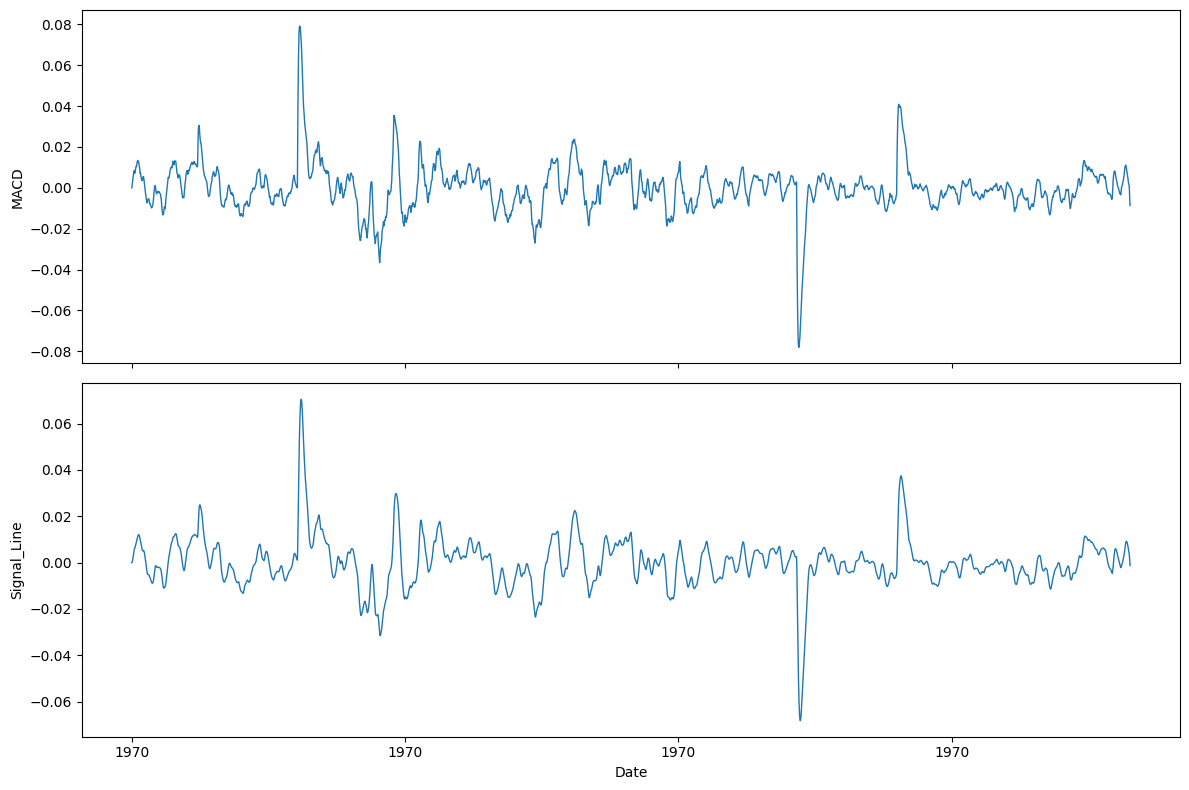

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0999/D1_09.csv', sep='\t')

# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Select the features to plot
features_to_plot = ['MACD', 'Signal_Line']  # Include only MACD and Signal_Line

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data.index, data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


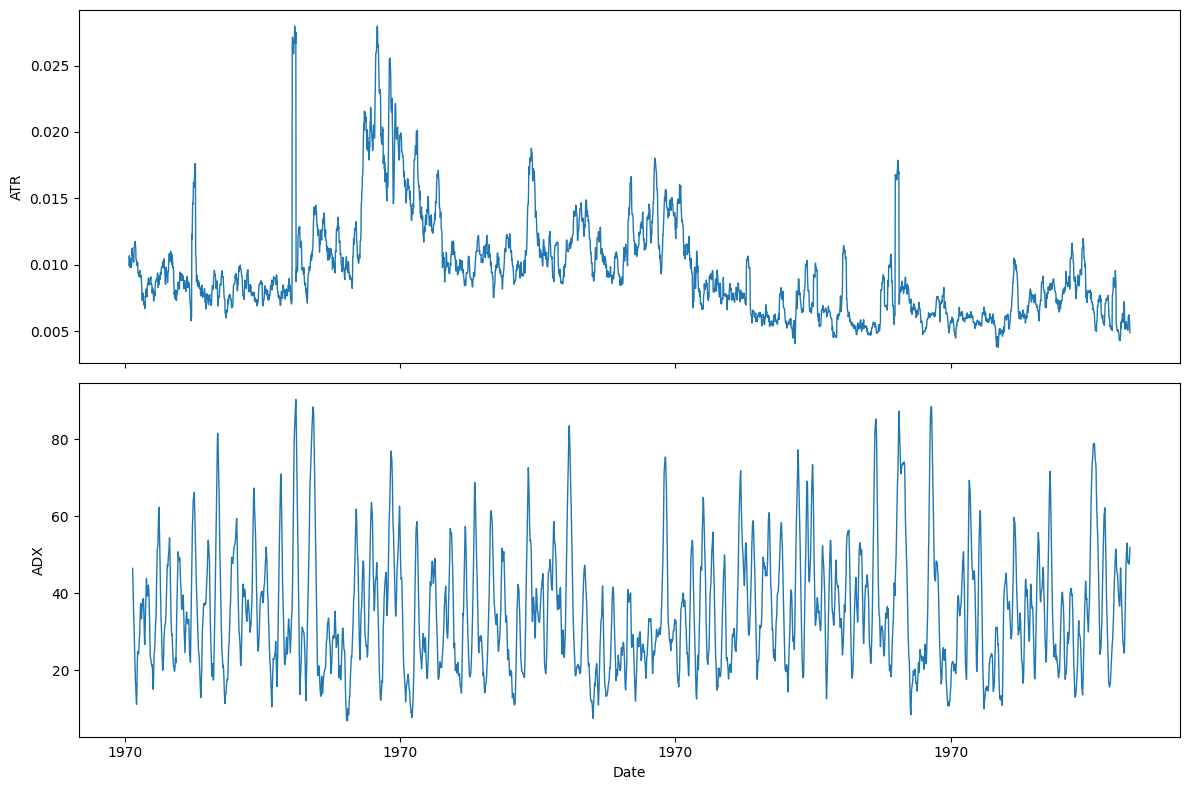

In [22]:
# Select the features to plot
features_to_plot = ['ATR', 'ADX']  # Include ATR and ADX

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data.index, data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


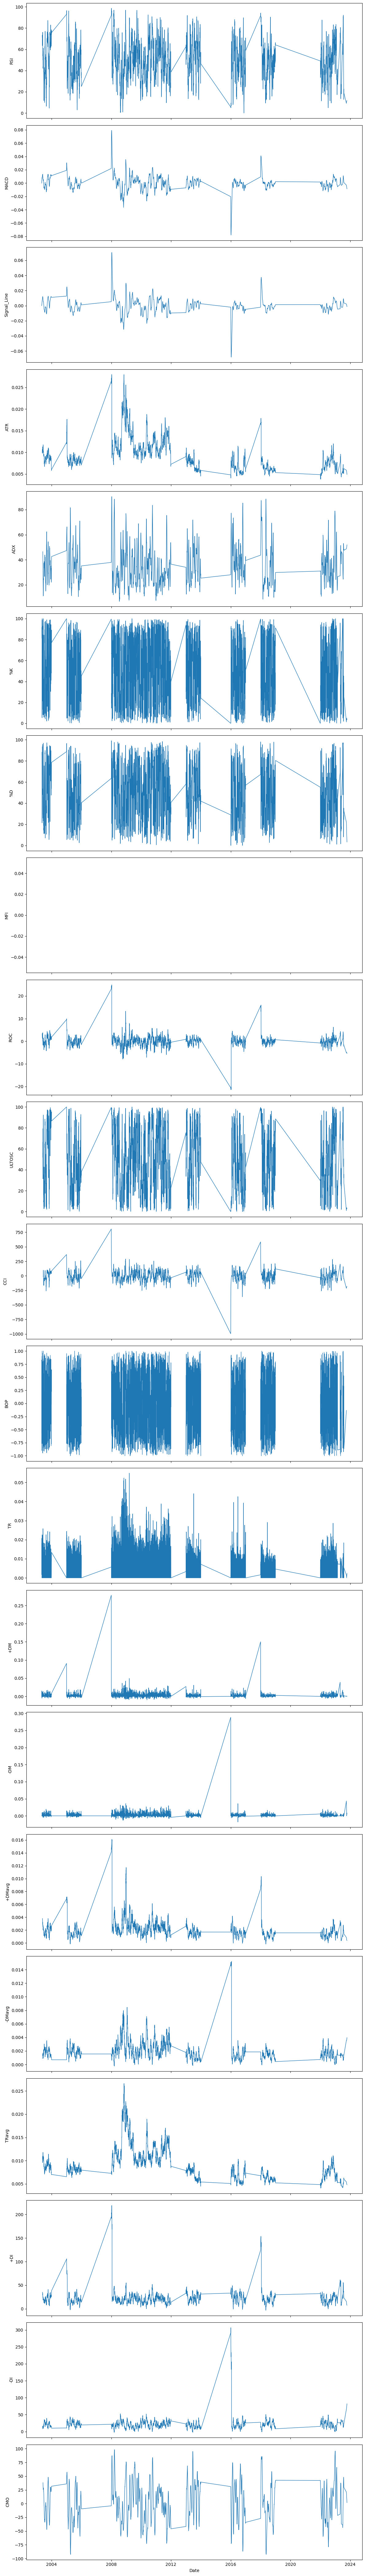

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/d1-0999/D1_09.csv', sep='\t')

# Combine year, month, and day columns to create a date column
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Select the features to plot
features_to_plot = ['RSI', 'MACD', 'Signal_Line', 'ATR', 'ADX', '%K', '%D', 'MFI', 'ROC', 'ULTOSC', 'CCI', 'BOP', 'TR', '+DM', '-DM', '+DMavg', '-DMavg', 'TRavg', '+DI', '-DI', 'CMO']

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data['Date'], data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-011/M5_withdates.csv', sep='\t')

# Split the 'date' column into 'day,' 'month,' and 'year' columns
data[['day', 'month', 'year']] = data['date'].str.split('-', expand=True)

# Split the 'time' column into 'hour' and 'minute' columns
data[['hour', 'minute']] = data['time'].str.split(':', expand=True)

# Remove the original 'date' and 'time' columns
data.drop(columns=['date', 'time'], inplace=True)

# Clean the numeric columns by rounding to 5 decimal places
numeric_columns = ['open', 'high', 'low', 'close', 'volume']
data[numeric_columns] = data[numeric_columns].round(5)



# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/M5_02', sep='\t', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m1-011/M1_dandT.csv')

# Convert the 'timestamp' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract the day, month, and year into separate columns
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Drop the original 'timestamp' column
data = data.drop(columns=['date'])

# Save the modified dataset
data.to_csv('/kaggle/working/M1_02.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m1-m222/M1_02.csv', sep='\t')

# Extract 'hour', 'minute', and 'second' from the 'time' column
data[['hour', 'minute', 'second']] = data['time'].str.split(':', expand=True)

# Convert the 'hour', 'minute', and 'second' columns to integers
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)
data['second'] = data['second'].astype(int)

# Drop the 'time' column
data = data.drop(columns=['time'])

# Save the modified dataset to the specified path
data.to_csv('/kaggle/working/M1_02_modified.csv', sep='\t', index=False)


In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m1-m222/M1_02.csv', sep='\t')

# Print the column names
print(data.columns)


Index(['open,high,low,close,volume,time,day,month,year'], dtype='object')


In [ ]:
import pandas as pd

# Load the dataset with ',' as the separator
data = pd.read_csv('/kaggle/input/m1-m222/M1_02.csv', sep=',')

# Display the first few rows of the dataset to verify it loaded correctly
print(data.head())

# Extract 'hour' and 'minute' from the 'time' column
time_split = data['time'].str.split(':', expand=True)
data['hour'] = time_split[0].astype(int)
data['minute'] = time_split[1].astype(int)

# Drop the 'time' column
data = data.drop(columns=['time'])

# Save the modified dataset to the specified path
data.to_csv('/kaggle/working/M1_03.csv', sep=',', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m1-m222/M1_02.csv', sep='\t')

# Display the first few rows of the dataset
print(data.head())


In [ ]:
import pandas as pd

# Load the dataset with a comma as the separator
data = pd.read_csv('/kaggle/input/m1-0444/M1_03.csv', sep=',')

# Define the time frames in minutes
time_frames = [1, 5, 15]

# Function to generate binary labels for a specific time frame
def generate_labels(data, time_frame):
    labels = []
    for i in range(len(data) - time_frame):
        current_close = data['close'][i]  # Updated column name to 'close'
        future_close = data['close'][i + time_frame]  # Updated column name to 'close'
        if future_close > current_close:
            labels.append("Up")
        else:
            labels.append("Down")
    # For the last data points, we cannot predict the next price, so we'll use NaN.
    labels.extend([None] * time_frame)
    return labels

# Create a new DataFrame to store data for all time frames
multi_task_data = data.copy()

# Generate binary labels for each time frame
for time_frame in time_frames:
    labels = generate_labels(data, time_frame)
    column_name = f'Label {time_frame} (Up/Down)'
    multi_task_data[column_name] = labels

# Drop rows with NaN labels (corresponding to the last data points)
multi_task_data = multi_task_data.dropna()

# Save the modified dataset with labels for multi-task learning
multi_task_data.to_csv('/kaggle/working/M1_04.csv', sep=',', index=False)


In [ ]:
import pandas as pd

# Load the dataset with a comma as the separator
data = pd.read_csv('/kaggle/input/m1-0444/M1_03.csv', sep=',')

# Check the column names
print(data.columns)


In [ ]:
import pandas as pd

# Load the dataset with a comma as the separator
data = pd.read_csv('/kaggle/input/m1-0555/M1_04.csv', sep=',') 

# Calculate Volatility_High, Volatility_Low, and Trend_Duration
data['Volatility_High'] = data['high'] - data['low']
data['Volatility_Low'] = data['close'] - data['low']
data['Trend_Duration'] = data.groupby('Label 1 (Up/Down)')['minute'].cumcount() + 1

# Save the modified dataset
data.to_csv('/kaggle/working/M1_05.csv', sep=',', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m1-0666/M1_05.csv', sep=',')

# Calculate RSI (Relative Strength Index)
rsi_period = 14
delta = data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = (100 - (100 / (1 + rs))).round(5)

# Calculate MACD (Moving Average Convergence Divergence)
ema_12 = data['close'].ewm(span=12, adjust=False).mean()
ema_26 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = (ema_12 - ema_26).round(5)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean().round(5)

# Calculate ADX (Average Directional Index)
n = 14
tr = pd.DataFrame()
tr['hl'] = (data['high'] - data['low']).round(5)
tr['hpc'] = ((data['high'] - data['close'].shift(1)).clip(lower=0)).round(5)
tr['lpc'] = ((data['low'] - data['close'].shift(1)).clip(lower=0)).round(5)

tr['tr'] = (tr[['hl', 'hpc', 'lpc']].max(axis=1)).round(5)
atr = (tr['tr'].rolling(n).mean()).round(5)
data['ATR'] = atr

up = (data['high'] - data['high'].shift(1)).round(5)
down = (-(data['low'] - data['low'].shift(1))).round(5)

pos_dm = (up > down) & (up > 0)
neg_dm = (down > up) & (down > 0)
pos_dm = (pos_dm * up).round(5)
neg_dm = (neg_dm * down).round(5)
avg_pos_dm = (pos_dm.rolling(n).mean()).round(5)
avg_neg_dm = (neg_dm.rolling(n).mean()).round(5)
pos_di = (avg_pos_dm / atr * 100).round(5)
neg_di = (avg_neg_dm / atr * 100).round(5)
data['ADX'] = ((pos_di - neg_di).abs() / (pos_di + neg_di).abs()).rolling(n).mean() * 100
data['ADX'] = data['ADX'].round(5)

# Calculate Stochastic Oscillator
k_period = 5
d_period = 3
min_low = (data['low'].rolling(k_period).min()).round(5)
max_high = (data['high'].rolling(k_period).max()).round(5)
data['%K'] = (100 * (data['close'] - min_low) / (max_high - min_low)).round(5)
data['%D'] = (data['%K'].rolling(d_period).mean()).round(5)

# Calculate MFI (Money Flow Index)
mfi_period = 14
typical_price = ((data['high'] + data['low'] + data['close']) / 3).round(5)
raw_money_flow = (typical_price * data['volume']).round(5)
money_flow_ratio = ((raw_money_flow.where(data['close'] > data['close'].shift(1)).rolling(mfi_period).sum()) / (raw_money_flow.where(data['close'] < data['close'].shift(1)).rolling(mfi_period).sum())).round(5)
data['MFI'] = (100 - (100 / (1 + money_flow_ratio))).round(5)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = (100 * (data['close'] - data['close'].shift(roc_period)) / data['close'].shift(roc_period)).round(5)

# Calculate Ultimate Oscillator (ULTOSC)
period1 = 7
period2 = 14
period3 = 28
avg1 = (data['close'].rolling(window=period1).mean()).round(5)
avg2 = (data['close'].rolling(window=period2).mean()).round(5)
avg3 = (data['close'].rolling(window=period3).mean()).round(5)
bp = (data['close'] - data['low'].rolling(window=period1).min()).round(5)
tr = (data['high'].rolling(window=period1).max() - data['low'].rolling(window=period1).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period2).min()).round(5)
tr += (data['high'].rolling(window=period2).max() - data['low'].rolling(window=period2).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period3).min()).round(5)
tr += (data['high'].rolling(window=period3).max() - data['low'].rolling(window=period3).min()).round(5)
avg_bp = (bp / 3).round(5)
avg_tr = (tr / 3).round(5)
ultosc = (100 * (avg_bp / avg_tr)).round(5)
data['ULTOSC'] = ultosc.round(5)

# Calculate CCI (Commodity Channel Index)
cci_period = 20
tp = ((data['high'] + data['low'] + data['close']) / 3).round(5)
sma = (tp.rolling(cci_period).mean()).round(5)
mean_deviation = ((tp - sma).abs().rolling(cci_period).mean()).round(5)
data['CCI'] = ((tp - sma) / (0.015 * mean_deviation)).round(5)

# Calculate BOP (Balance of Power)
bop = (((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low'])).round(5)
data['BOP'] = bop.round(5)

# Calculate CMO (Chande Momentum Oscillator)
cmo_period = 14
sum_period = 20
data['TR'] = (data['high'] - data['low']).round(5)
data['+DM'] = ((data['high'] - data['high'].shift(1)).where((data['high'] - data['high'].shift(1) > data['low'].shift(1) - data['low']), 0)).round(5)
data['-DM'] = ((data['low'].shift(1) - data['low']).where((data['low'].shift(1) - data['low'] > data['high'] - data['high'].shift(1)), 0)).round(5)
data['+DMavg'] = (data['+DM'].rolling(sum_period).mean()).round(5)
data['-DMavg'] = (data['-DM'].rolling(sum_period).mean()).round(5)
data['TRavg'] = (data['TR'].rolling(sum_period).mean()).round(5)
data['+DI'] = (100 * (data['+DMavg'] / data['TRavg'])).round(5)
data['-DI'] = (100 * (data['-DMavg'] / data['TRavg'])).round(5)
data['CMO'] = (100 * ((data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(cmo_period).mean()).round(5)

# Save the modified dataset with new features to the specified path
data.to_csv('/kaggle/working/M1_06.csv', sep=',', index=False)


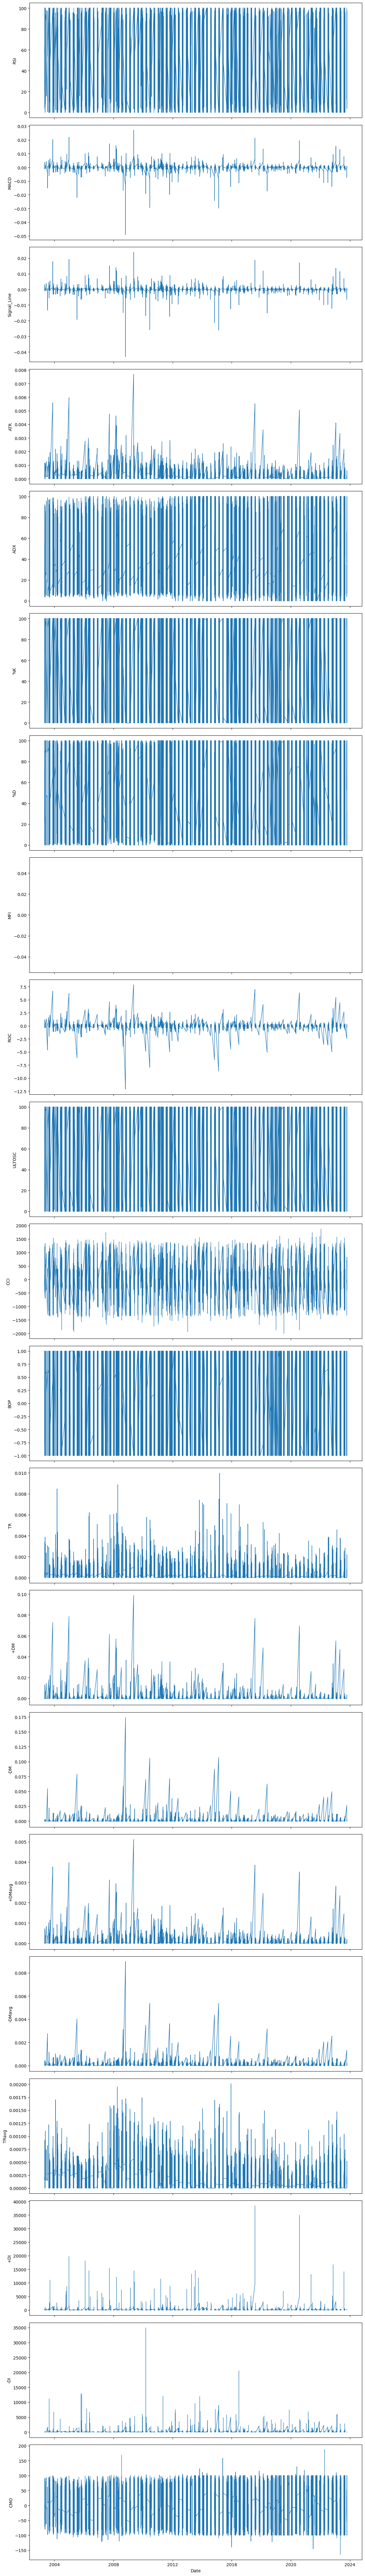

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/m1-m777/M1_06.csv', sep=',')

# Combine year, month, and day columns to create a date column
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Select the features to plot
features_to_plot = ['RSI', 'MACD', 'Signal_Line', 'ATR', 'ADX', '%K', '%D', 'MFI', 'ROC', 'ULTOSC', 'CCI', 'BOP', 'TR', '+DM', '-DM', '+DMavg', '-DMavg', 'TRavg', '+DI', '-DI', 'CMO']

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data['Date'], data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-011/M5_withdates.csv')

# Check the column names and data types
print(data.dtypes)
print(data.columns)


In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m15-011/M15_with_dates_and_split.csv')

# Convert 'date' to datetime with a flexible approach
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')

# Create separate 'year', 'month', and 'day' columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original 'date' column
data.drop('date', axis=1, inplace=True)

# Save the modified dataset to a new file
data.to_csv('/kaggle/working/M15_02.csv', index=False)

# Display the modified dataset
print(data)


/tmp/ipykernel_32/1353883801.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')


           open     high      low    close     volume   time    year  month  \
0       1.12921  1.12942  1.12887  1.12918  7722.9999  00:00  2003.0    6.0   
1       1.12918  1.12936  1.12831  1.12910  7378.4001  00:15  2003.0    6.0   
2       1.12909  1.12994  1.12871  1.12983  7685.4000  00:30  2003.0    6.0   
3       1.12969  1.12977  1.12897  1.12897  6464.4001  00:45  2003.0    6.0   
4       1.12882  1.12890  1.12814  1.12868  7842.0001  01:00  2003.0    6.0   
...         ...      ...      ...      ...        ...    ...     ...    ...   
121531  1.06974  1.06974  1.06974  1.06974     0.0000  22:45  2023.0    9.0   
121532  1.06974  1.06974  1.06974  1.06974     0.0000  23:00  2023.0    9.0   
121533  1.06974  1.06974  1.06974  1.06974     0.0000  23:15  2023.0    9.0   
121534  1.06974  1.06974  1.06974  1.06974     0.0000  23:30  2023.0    9.0   
121535  1.06974  1.06974  1.06974  1.06974     0.0000  23:45  2023.0    9.0   

        day  
0       5.0  
1       5.0  
2       5

In [26]:
import pandas as pd

# Load the modified dataset
data = pd.read_csv('/kaggle/input/m15-o33/M15_02.csv')

# Convert 'time' to datetime with a flexible approach
data['time'] = pd.to_datetime(data['time'], format='%H:%M', errors='coerce')

# Create separate 'hour' and 'minute' columns
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute

# Drop the original 'time' column
data.drop('time', axis=1, inplace=True)

# Save the modified dataset to a new file
data.to_csv('/kaggle/working/M15_04.csv', index=False)

# Display the modified dataset
print(data)


           open     high      low    close     volume    year  month  day  \
0       1.12921  1.12942  1.12887  1.12918  7722.9999  2003.0    6.0  5.0   
1       1.12918  1.12936  1.12831  1.12910  7378.4001  2003.0    6.0  5.0   
2       1.12909  1.12994  1.12871  1.12983  7685.4000  2003.0    6.0  5.0   
3       1.12969  1.12977  1.12897  1.12897  6464.4001  2003.0    6.0  5.0   
4       1.12882  1.12890  1.12814  1.12868  7842.0001  2003.0    6.0  5.0   
...         ...      ...      ...      ...        ...     ...    ...  ...   
121531  1.06974  1.06974  1.06974  1.06974     0.0000  2023.0    9.0  9.0   
121532  1.06974  1.06974  1.06974  1.06974     0.0000  2023.0    9.0  9.0   
121533  1.06974  1.06974  1.06974  1.06974     0.0000  2023.0    9.0  9.0   
121534  1.06974  1.06974  1.06974  1.06974     0.0000  2023.0    9.0  9.0   
121535  1.06974  1.06974  1.06974  1.06974     0.0000  2023.0    9.0  9.0   

        hour  minute  
0          0       0  
1          0      15  
2     

In [27]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-0555/M5_04.csv', sep=',')

# Calculate price change over different time intervals
data['5min_change'] = data['close'].shift(-1) - data['close']
data['15min_change'] = data['close'].shift(-3) - data['close']
data['30min_change'] = data['close'].shift(-6) - data['close']

# Create labels for price direction (Up/Down) for different time intervals
data['Label_5min'] = 'Down'
data['Label_5min'][data['5min_change'] > 0] = 'Up'
data['Label_15min'] = 'Down'
data['Label_15min'][data['15min_change'] > 0] = 'Up'
data['Label_30min'] = 'Down'
data['Label_30min'][data['30min_change'] > 0] = 'Up'

# Print the modified dataset
print(data)
# Save the modified dataset to a CSV file
data.to_csv('/kaggle/working/M5_05.csv', index=False)



/tmp/ipykernel_32/3313435310.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label_5min'][data['5min_change'] > 0] = 'Up'
/tmp/ipykernel_32/3313435310.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label_15min'][data['15min_change'] > 0] = 'Up'
/tmp/ipykernel_32/3313435310.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label_30min'][data['30min_change'] > 0] = 'Up'


           open     high      low    close   volume    year  month  day  hour  \
0       1.12284  1.12313  1.12256  1.12294  2476.00  2003.0    4.0  5.0    21   
1       1.12304  1.12310  1.12276  1.12284  2883.30  2003.0    4.0  5.0    21   
2       1.12314  1.12338  1.12282  1.12312  2513.00  2003.0    4.0  5.0    21   
3       1.12312  1.12312  1.12279  1.12285  1988.70  2003.0    4.0  5.0    21   
4       1.12288  1.12311  1.12242  1.12304  2309.80  2003.0    4.0  5.0    21   
...         ...      ...      ...      ...      ...     ...    ...  ...   ...   
372415  1.07127  1.07148  1.07125  1.07148   118.80  2023.0   10.0  9.0    23   
372416  1.07149  1.07164  1.07142  1.07163   473.82  2023.0   10.0  9.0    23   
372417  1.07166  1.07191  1.07166  1.07188   705.02  2023.0   10.0  9.0    23   
372418  1.07189  1.07204  1.07180  1.07181   981.99  2023.0   10.0  9.0    23   
372419  1.07180  1.07182  1.07159  1.07162   733.38  2023.0   10.0  9.0    23   

        minute  5min_change

In [28]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-0555/M5_04.csv', sep='\t')

# Print the column names to identify the closing price column
print(data.columns)


Index(['open,high,low,close,volume,year,month,day,hour,minute'], dtype='object')


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-0666/M5_05.csv')

# Calculate price change over different time intervals
data['Price_Up'] = (data['close'].shift(-1) - data['close']) > 0

# Calculate volatility high and low over different time intervals
data['Volatility_High'] = data['high'].rolling(window=4).max()
data['Volatility_Low'] = data['low'].rolling(window=4).min()

# Calculate trend duration
data['Trend_Duration'] = (data['Price_Up'] != data['Price_Up'].shift(1)).cumsum()

# Save the modified dataset to a CSV file
data.to_csv('/kaggle/working/M5_06.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-07777/M5_06.csv', sep=',')

# Calculate RSI (Relative Strength Index)
rsi_period = 14
delta = data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = (100 - (100 / (1 + rs))).round(5)

# Calculate MACD (Moving Average Convergence Divergence)
ema_12 = data['close'].ewm(span=12, adjust=False).mean()
ema_26 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = (ema_12 - ema_26).round(5)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean().round(5)

# Calculate ADX (Average Directional Index)
n = 14
tr = pd.DataFrame()
tr['hl'] = (data['high'] - data['low']).round(5)
tr['hpc'] = ((data['high'] - data['close'].shift(1)).clip(lower=0)).round(5)
tr['lpc'] = ((data['low'] - data['close'].shift(1)).clip(lower=0)).round(5)

tr['tr'] = (tr[['hl', 'hpc', 'lpc']].max(axis=1)).round(5)
atr = (tr['tr'].rolling(n).mean()).round(5)
data['ATR'] = atr

up = (data['high'] - data['high'].shift(1)).round(5)
down = (-(data['low'] - data['low'].shift(1))).round(5)

pos_dm = (up > down) & (up > 0)
neg_dm = (down > up) & (down > 0)
pos_dm = (pos_dm * up).round(5)
neg_dm = (neg_dm * down).round(5)
avg_pos_dm = (pos_dm.rolling(n).mean()).round(5)
avg_neg_dm = (neg_dm.rolling(n).mean()).round(5)
pos_di = (avg_pos_dm / atr * 100).round(5)
neg_di = (avg_neg_dm / atr * 100).round(5)
data['ADX'] = ((pos_di - neg_di).abs() / (pos_di + neg_di).abs()).rolling(n).mean() * 100
data['ADX'] = data['ADX'].round(5)

# Calculate Stochastic Oscillator
k_period = 5
d_period = 3
min_low = (data['low'].rolling(k_period).min()).round(5)
max_high = (data['high'].rolling(k_period).max()).round(5)
data['%K'] = (100 * (data['close'] - min_low) / (max_high - min_low)).round(5)
data['%D'] = (data['%K'].rolling(d_period).mean()).round(5)

# Calculate MFI (Money Flow Index)
mfi_period = 14
typical_price = ((data['high'] + data['low'] + data['close']) / 3).round(5)
raw_money_flow = (typical_price * data['volume']).round(5)
money_flow_ratio = ((raw_money_flow.where(data['close'] > data['close'].shift(1)).rolling(mfi_period).sum()) / (raw_money_flow.where(data['close'] < data['close'].shift(1)).rolling(mfi_period).sum())).round(5)
data['MFI'] = (100 - (100 / (1 + money_flow_ratio))).round(5)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = (100 * (data['close'] - data['close'].shift(roc_period)) / data['close'].shift(roc_period)).round(5)

# Calculate Ultimate Oscillator (ULTOSC)
period1 = 7
period2 = 14
period3 = 28
avg1 = (data['close'].rolling(window=period1).mean()).round(5)
avg2 = (data['close'].rolling(window=period2).mean()).round(5)
avg3 = (data['close'].rolling(window=period3).mean()).round(5)
bp = (data['close'] - data['low'].rolling(window=period1).min()).round(5)
tr = (data['high'].rolling(window=period1).max() - data['low'].rolling(window=period1).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period2).min()).round(5)
tr += (data['high'].rolling(window=period2).max() - data['low'].rolling(window=period2).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period3).min()).round(5)
tr += (data['high'].rolling(window=period3).max() - data['low'].rolling(window=period3).min()).round(5)
avg_bp = (bp / 3).round(5)
avg_tr = (tr / 3).round(5)
ultosc = (100 * (avg_bp / avg_tr)).round(5)
data['ULTOSC'] = ultosc.round(5)

# Calculate CCI (Commodity Channel Index)
cci_period = 20
tp = ((data['high'] + data['low'] + data['close']) / 3).round(5)
sma = (tp.rolling(cci_period).mean()).round(5)
mean_deviation = ((tp - sma).abs().rolling(cci_period).mean()).round(5)
data['CCI'] = ((tp - sma) / (0.015 * mean_deviation)).round(5)

# Calculate BOP (Balance of Power)
bop = (((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low'])).round(5)
data['BOP'] = bop.round(5)

# Calculate CMO (Chande Momentum Oscillator)
cmo_period = 14
sum_period = 20
data['TR'] = (data['high'] - data['low']).round(5)
data['+DM'] = ((data['high'] - data['high'].shift(1)).where((data['high'] - data['high'].shift(1) > data['low'].shift(1) - data['low']), 0)).round(5)
data['-DM'] = ((data['low'].shift(1) - data['low']).where((data['low'].shift(1) - data['low'] > data['high'] - data['high'].shift(1)), 0)).round(5)
data['+DMavg'] = (data['+DM'].rolling(sum_period).mean()).round(5)
data['-DMavg'] = (data['-DM'].rolling(sum_period).mean()).round(5)
data['TRavg'] = (data['TR'].rolling(sum_period).mean()).round(5)
data['+DI'] = (100 * (data['+DMavg'] / data['TRavg'])).round(5)
data['-DI'] = (100 * (data['-DMavg'] / data['TRavg'])).round(5)
data['CMO'] = (100 * ((data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(cmo_period).mean()).round(5)

# Calculate binary labels for price direction
data['Label_5min'] = data['5min_change'].apply(lambda x: 'Up' if x > 0 else 'Down')
data['Label_15min'] = data['15min_change'].apply(lambda x: 'Up' if x > 0 else 'Down')
data['Label_30min'] = data['30min_change'].apply(lambda x: 'Up' if x > 0 else 'Down')

# Save the modified dataset with new features and labels to the specified path
data.to_csv('/kaggle/working/M5_06_with_additional_columns.csv', sep='\t', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/m5-modified/M5_06_with_additional_columns.csv', sep='\t')

# Combine year, month, day columns to create a date column
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Select the features to plot
features_to_plot = ['RSI', 'MACD', 'Signal_Line', 'ATR', 'ADX', '%K', '%D', 'MFI', 'ROC', 'ULTOSC', 'CCI', 'BOP', 'TR', '+DM', '-DM', '+DMavg', '-DMavg', 'TRavg', '+DI', '-DI', 'CMO']

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data['Date'], data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m15-055/M15_04.csv', sep=',')

# Calculate price change over different time intervals
data['15min_change'] = data['close'].shift(-3) - data['close']
data['30min_change'] = data['close'].shift(-6) - data['close']
data['1hr_change'] = data['close'].shift(-4 * 1) - data['close']
data['3hr_change'] = data['close'].shift(-4 * 3) - data['close']

# Create labels for price direction (Up/Down) for different time intervals
data['Label_15min'] = 'Down'
data['Label_15min'][data['15min_change'] > 0] = 'Up'
data['Label_30min'] = 'Down'
data['Label_30min'][data['30min_change'] > 0] = 'Up'
data['Label_1hr'] = 'Down'
data['Label_1hr'][data['1hr_change'] > 0] = 'Up'
data['Label_3hr'] = 'Down'
data['Label_3hr'][data['3hr_change'] > 0] = 'Up'

# Print the modified dataset
print(data)

# Save the modified dataset to a CSV file
data.to_csv('/kaggle/working/15_06.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m15-07/15_06.csv', sep=',')

# Calculate price change over different time intervals and round the values to 5 decimal places
data['15min_change'] = (data['close'].shift(-3) - data['close']).round(5)
data['30min_change'] = (data['close'].shift(-6) - data['close']).round(5)
data['1hr_change'] = (data['close'].shift(-4 * 1) - data['close']).round(5)
data['3hr_change'] = (data['close'].shift(-4 * 3) - data['close']).round(5)

# Calculate volatility high and low for different time intervals and round the values to 5 decimal places
data['Volatility_High_15min'] = (data['high'].rolling(window=3).max()).round(5)
data['Volatility_Low_15min'] = (data['low'].rolling(window=3).min()).round(5)
data['Volatility_High_30min'] = (data['high'].rolling(window=6).max()).round(5)
data['Volatility_Low_30min'] = (data['low'].rolling(window=6).min()).round(5)
data['Volatility_High_1hr'] = (data['high'].rolling(window=4 * 1).max()).round(5)
data['Volatility_Low_1hr'] = (data['low'].rolling(window=4 * 1).min()).round(5)
data['Volatility_High_3hr'] = (data['high'].rolling(window=4 * 3).max()).round(5)
data['Volatility_Low_3hr'] = (data['low'].rolling(window=4 * 3).min()).round(5)





# Calculate trend duration for different time intervals
data['Trend_Duration_15min'] = (data['15min_change'] > 0).astype(int).groupby(data['Label_15min']).cumsum()
data['Trend_Duration_30min'] = (data['30min_change'] > 0).astype(int).groupby(data['Label_30min']).cumsum()
data['Trend_Duration_1hr'] = (data['1hr_change'] > 0).astype(int).groupby(data['Label_1hr']).cumsum()
data['Trend_Duration_3hr'] = (data['3hr_change'] > 0).astype(int).groupby(data['Label_3hr']).cumsum()

# Create labels for price direction (Up/Down) for different time intervals
data['Label_15min'] = 'Down'
data['Label_15min'][data['15min_change'] > 0] = 'Up'
data['Label_30min'] = 'Down'
data['Label_30min'][data['30min_change'] > 0] = 'Up'
data['Label_1hr'] = 'Down'
data['Label_1hr'][data['1hr_change'] > 0] = 'Up'
data['Label_3hr'] = 'Down'
data['Label_3hr'][data['3hr_change'] > 0] = 'Up'

# Print the modified dataset
print(data)

# Save the modified dataset to a CSV file
data.to_csv('/kaggle/working/M15_08.csv', index=False)


In [ ]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('/kaggle/input/m15-099/M15_08.csv', sep=',')

# Calculate RSI (Relative Strength Index)
rsi_period = 14
delta = data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = (100 - (100 / (1 + rs))).round(5)

# Calculate MACD (Moving Average Convergence Divergence)
ema_12 = data['close'].ewm(span=12, adjust=False).mean()
ema_26 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = (ema_12 - ema_26).round(5)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean().round(5)

# Calculate ADX (Average Directional Index)
n = 14
tr = pd.DataFrame()
tr['hl'] = (data['high'] - data['low']).round(5)
tr['hpc'] = ((data['high'] - data['close'].shift(1)).clip(lower=0)).round(5)
tr['lpc'] = ((data['low'] - data['close'].shift(1)).clip(lower=0)).round(5)

tr['tr'] = (tr[['hl', 'hpc', 'lpc']].max(axis=1)).round(5)
atr = (tr['tr'].rolling(n).mean()).round(5)
data['ATR'] = atr

up = (data['high'] - data['high'].shift(1)).round(5)
down = (data['low'] - data['low'].shift(1)).round(5)

pos_dm = (up > down) & (up > 0)
neg_dm = (down > up) & (down > 0)
pos_dm = (pos_dm * up).round(5)
neg_dm = (neg_dm * down).round(5)
avg_pos_dm = (pos_dm.rolling(n).mean()).round(5)
avg_neg_dm = (neg_dm.rolling(n).mean()).round(5)
pos_di = (avg_pos_dm / atr * 100).round(5)
neg_di = (avg_neg_dm / atr * 100).round(5)
data['ADX'] = ((pos_di - neg_di).abs() / (pos_di + neg_di).abs()).rolling(n).mean() * 100
data['ADX'] = data['ADX'].round(5)

# Calculate Stochastic Oscillator
k_period = 5
d_period = 3
min_low = (data['low'].rolling(k_period).min()).round(5)
max_high = (data['high'].rolling(k_period).max()).round(5)
data['%K'] = (100 * (data['close'] - min_low) / (max_high - min_low)).round(5)
data['%D'] = (data['%K'].rolling(d_period).mean()).round(5)

# Calculate MFI (Money Flow Index)
mfi_period = 14
typical_price = ((data['high'] + data['low'] + data['close']) / 3).round(5)
raw_money_flow = (typical_price * data['volume']).round(5)
money_flow_ratio = ((raw_money_flow.where(data['close'] > data['close'].shift(1)).rolling(mfi_period).sum()) / (raw_money_flow.where(data['close'] < data['close'].shift(1)).rolling(mfi_period).sum())).round(5)
data['MFI'] = (100 - (100 / (1 + money_flow_ratio))).round(5)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = (100 * (data['close'] - data['close'].shift(roc_period)) / data['close'].shift(roc_period)).round(5)

# Calculate Ultimate Oscillator (ULTOSC)
period1 = 7
period2 = 14
period3 = 28
avg1 = (data['close'].rolling(window=period1).mean()).round(5)
avg2 = (data['close'].rolling(window=period2).mean()).round(5)
avg3 = (data['close'].rolling(window=period3).mean()).round(5)
bp = (data['close'] - data['low'].rolling(window=period1).min()).round(5)
tr = (data['high'].rolling(window=period1).max() - data['low'].rolling(window=period1).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period2).min()).round(5)
tr += (data['high'].rolling(window=period2).max() - data['low'].rolling(window=period2).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period3).min()).round(5)
tr += (data['high'].rolling(window=period3).max() - data['low'].rolling(window=period3).min()).round(5)
avg_bp = (bp / 3).round(5)
avg_tr = (tr / 3).round(5)
ultosc = (100 * (avg_bp / avg_tr)).round(5)
data['ULTOSC'] = ultosc.round(5)

# Calculate CCI (Commodity Channel Index)
cci_period = 20
tp = ((data['high'] + data['low'] + data['close']) / 3).round(5)
sma = (tp.rolling(cci_period).mean()).round(5)
mean_deviation = ((tp - sma).abs().rolling(cci_period).mean()).round(5)
data['CCI'] = ((tp - sma) / (0.015 * mean_deviation)).round(5)

# Calculate BOP (Balance of Power)
bop = (((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low'])).round(5)
data['BOP'] = bop.round(5)

# Calculate CMO (Chande Momentum Oscillator)
cmo_period = 14
sum_period = 20
data['TR'] = (data['high'] - data['low']).round(5)
data['+DM'] = ((data['high'] - data['high'].shift(1)).where((data['high'] - data['high'].shift(1) > data['low'].shift(1) - data['low']), 0)).round(5)
data['-DM'] = ((data['low'].shift(1) - data['low']).where((data['low'].shift(1) - data['low'] > data['high'] - data['high'].shift(1)), 0)).round(5)
data['+DMavg'] = (data['+DM'].rolling(sum_period).mean()).round(5)
data['-DMavg'] = (data['-DM'].rolling(sum_period).mean()).round(5)
data['TRavg'] = (data['TR'].rolling(sum_period).mean()).round(5)
data['+DI'] = (100 * (data['+DMavg'] / data['TRavg'])).round(5)
data['-DI'] = (100 * (data['-DMavg'] / data['TRavg'])).round(5)
data['CMO'] = (100 * ((data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(cmo_period).mean()).round(5)

# Create binary labels for price direction
data['Label_15min'] = data['15min_change'].apply(lambda x: 'Up' if x > 0 else 'Down')
data['Label_30min'] = data['30min_change'].apply(lambda x: 'Up' if x > 0 else 'Down')

# Save the modified dataset with new features and labels to the specified path
data.to_csv('/kaggle/working/M15_09.csv', index=False)


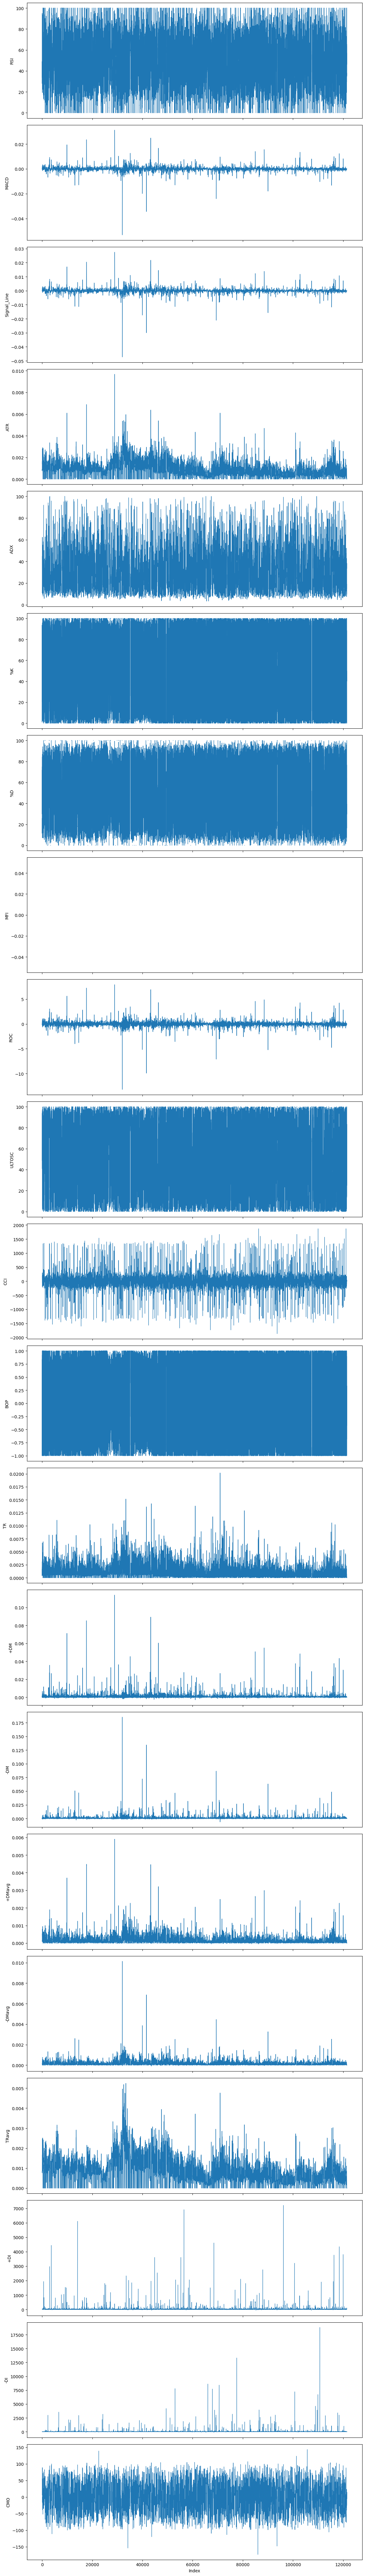

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/m15-1000/M15_09.csv', sep=',')

# Select the features to plot
features_to_plot = ['RSI', 'MACD', 'Signal_Line', 'ATR', 'ADX', '%K', '%D', 'MFI', 'ROC', 'ULTOSC', 'CCI', 'BOP', 'TR', '+DM', '-DM', '+DMavg', '-DMavg', 'TRavg', '+DI', '-DI', 'CMO']

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data.index, data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Index')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m30-01/M30_with_dates_and_split.csv')

# Convert 'date' to datetime 
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')

# Create separate 'year', 'month', and 'day' columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original 'date' column
data.drop('date', axis=1, inplace=True)

# Save the modified dataset to a new file
data.to_csv('/kaggle/working/M30_02.csv', index=False)

# Display the modified dataset
print(data)


In [30]:
import pandas as pd

# Load the modified dataset
data = pd.read_csv('/kaggle/input/m30-03/M30_02.csv')

# Convert 'time' to datetime with a flexible approach
data['time'] = pd.to_datetime(data['time'], format='%H:%M', errors='coerce')

# Create separate 'hour' and 'minute' columns
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute

# Drop the original 'time' column
data.drop('time', axis=1, inplace=True)

# Save the modified dataset to a new file
data.to_csv('/kaggle/working/M30_04.csv', index=False)

# Display the modified dataset
print(data)


          open     high      low    close      volume    year  month  day  \
0      1.12284  1.12338  1.12242  1.12297  14044.5000  2003.0    4.0  5.0   
1      1.12287  1.12313  1.12264  1.12305  15014.6001  2003.0    4.0  5.0   
2      1.12274  1.12287  1.12226  1.12261  13755.0000  2003.0    4.0  5.0   
3      1.12261  1.12302  1.12235  1.12241  12336.7999  2003.0    4.0  5.0   
4      1.12235  1.12235  1.12160  1.12197  14809.9001  2003.0    4.0  5.0   
...        ...      ...      ...      ...         ...     ...    ...  ...   
59525  1.05596  1.05639  1.05596  1.05618   1283.0800     NaN    NaN  NaN   
59526  1.06009  1.06011  1.05946  1.05977   4371.8600     NaN    NaN  NaN   
59527  1.05976  1.05999  1.05906  1.05943   6302.7800     NaN    NaN  NaN   
59528  1.05987  1.06032  1.05942  1.06026   3025.6100     NaN    NaN  NaN   
59529  1.06027  1.06091  1.06023  1.06086   4879.7400     NaN    NaN  NaN   

       hour  minute  
0        21       0  
1        21      30  
2        

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m30-05/M30_04.csv', sep=',')

# Calculate price change for 30-minute interval
data['30min_change'] = data['close'].shift(-6) - data['close']

# Calculate price change for 1-hour interval (2 consecutive 30-min periods)
data['1hr_change'] = data['close'].shift(-12) - data['close']

# Calculate price change for 4-hour interval (8 consecutive 30-min periods)
data['4hr_change'] = data['close'].shift(-48) - data['close']

# Calculate price change for 8-hour interval (16 consecutive 30-min periods)
data['8hr_change'] = data['close'].shift(-96) - data['close']

# Create labels for price direction (Up/Down) for different time intervals
data['Label_30min'] = 'Down'
data['Label_30min'][data['30min_change'] > 0] = 'Up'
data['Label_1hr'] = 'Down'
data['Label_1hr'][data['1hr_change'] > 0] = 'Up'
data['Label_4hr'] = 'Down'
data['Label_4hr'][data['4hr_change'] > 0] = 'Up'
data['Label_8hr'] = 'Down'
data['Label_8hr'][data['8hr_change'] > 0] = 'Up'

# Print the modified dataset
print(data)

# Save the modified dataset to a CSV file
data.to_csv('/kaggle/working/M30_06.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/m30-07/M30_06.csv', sep=',')

# Define time intervals
intervals = [30, 60, 240, 480]  # 30 minutes, 1 hour, 4 hours, 8 hours

# Calculate price change for each time interval
for interval in intervals:
    data[f'{interval}min_change'] = data['close'].shift(-interval) - data['close']

# Create labels for price direction (Up/Down) for different time intervals
for interval in intervals:
    data[f'Label_{interval}min'] = 'Down'
    data[f'Label_{interval}min'][data[f'{interval}min_change'] > 0] = 'Up'

# Calculate volatility high and low for each time interval
for interval in intervals:
    data[f'Volatility_High_{interval}min'] = (data['high'].rolling(interval).max() - data['close']).round(5)
    data[f'Volatility_Low_{interval}min'] = (data['close'] - data['low'].rolling(interval).min()).round(5)

# Calculate trend duration for each time interval
for interval in intervals:
    data[f'Trend_Duration_{interval}min'] = (data[f'Label_{interval}min'] != data[f'Label_{interval}min'].shift()).astype(int).cumsum()

# Print the modified dataset
print(data)

# Save the modified dataset to a CSV file
data.to_csv('/kaggle/working/M30_08.csv', index=False)


In [ ]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('/kaggle/input/m15-099/M15_08.csv', sep=',')

# Calculate RSI (Relative Strength Index)
rsi_period = 14
delta = data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = (100 - (100 / (1 + rs))).round(5)

# Calculate MACD (Moving Average Convergence Divergence)
ema_12 = data['close'].ewm(span=12, adjust=False).mean()
ema_26 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = (ema_12 - ema_26).round(5)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean().round(5)

# Calculate ADX (Average Directional Index)
n = 14
tr = pd.DataFrame()
tr['hl'] = (data['high'] - data['low']).round(5)
tr['hpc'] = ((data['high'] - data['close'].shift(1)).clip(lower=0)).round(5)
tr['lpc'] = ((data['low'] - data['close'].shift(1)).clip(lower=0)).round(5)

tr['tr'] = (tr[['hl', 'hpc', 'lpc']].max(axis=1)).round(5)
atr = (tr['tr'].rolling(n).mean()).round(5)
data['ATR'] = atr

up = (data['high'] - data['high'].shift(1)).round(5)
down = (data['low'] - data['low'].shift(1)).round(5)

pos_dm = (up > down) & (up > 0)
neg_dm = (down > up) & (down > 0)
pos_dm = (pos_dm * up).round(5)
neg_dm = (neg_dm * down).round(5)
avg_pos_dm = (pos_dm.rolling(n).mean()).round(5)
avg_neg_dm = (neg_dm.rolling(n).mean()).round(5)
pos_di = (avg_pos_dm / atr * 100).round(5)
neg_di = (avg_neg_dm / atr * 100).round(5)
data['ADX'] = ((pos_di - neg_di).abs() / (pos_di + neg_di).abs()).rolling(n).mean() * 100
data['ADX'] = data['ADX'].round(5)

# Calculate Stochastic Oscillator
k_period = 5
d_period = 3
min_low = (data['low'].rolling(k_period).min()).round(5)
max_high = (data['high'].rolling(k_period).max()).round(5)
data['%K'] = (100 * (data['close'] - min_low) / (max_high - min_low)).round(5)
data['%D'] = (data['%K'].rolling(d_period).mean()).round(5)

# Calculate MFI (Money Flow Index)
mfi_period = 14
typical_price = ((data['high'] + data['low'] + data['close']) / 3).round(5)
raw_money_flow = (typical_price * data['volume']).round(5)
money_flow_ratio = ((raw_money_flow.where(data['close'] > data['close'].shift(1)).rolling(mfi_period).sum()) / (raw_money_flow.where(data['close'] < data['close'].shift(1)).rolling(mfi_period).sum())).round(5)
data['MFI'] = (100 - (100 / (1 + money_flow_ratio))).round(5)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = (100 * (data['close'] - data['close'].shift(roc_period)) / data['close'].shift(roc_period)).round(5)

# Calculate Ultimate Oscillator (ULTOSC)
period1 = 7
period2 = 14
period3 = 28
avg1 = (data['close'].rolling(window=period1).mean()).round(5)
avg2 = (data['close'].rolling(window=period2).mean()).round(5)
avg3 = (data['close'].rolling(window=period3).mean()).round(5)
bp = (data['close'] - data['low'].rolling(window=period1).min()).round(5)
tr = (data['high'].rolling(window=period1).max() - data['low'].rolling(window=period1).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period2).min()).round(5)
tr += (data['high'].rolling(window=period2).max() - data['low'].rolling(window=period2).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period3).min()).round(5)
tr += (data['high'].rolling(window=period3).max() - data['low'].rolling(window=period3).min()).round(5)
avg_bp = (bp / 3).round(5)
avg_tr = (tr / 3).round(5)
ultosc = (100 * (avg_bp / avg_tr)).round(5)
data['ULTOSC'] = ultosc.round(5)

# Calculate CCI (Commodity Channel Index)
cci_period = 20
tp = ((data['high'] + data['low'] + data['close']) / 3).round(5)
sma = (tp.rolling(cci_period).mean()).round(5)
mean_deviation = ((tp - sma).abs().rolling(cci_period).mean()).round(5)
data['CCI'] = ((tp - sma) / (0.015 * mean_deviation)).round(5)

# Calculate BOP (Balance of Power)
bop = (((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low'])).round(5)
data['BOP'] = bop.round(5)

# Calculate CMO (Chande Momentum Oscillator)
cmo_period = 14
sum_period = 20
data['TR'] = (data['high'] - data['low']).round(5)
data['+DM'] = ((data['high'] - data['high'].shift(1)).where((data['high'] - data['high'].shift(1) > data['low'].shift(1) - data['low']), 0)).round(5)
data['-DM'] = ((data['low'].shift(1) - data['low']).where((data['low'].shift(1) - data['low'] > data['high'] - data['high'].shift(1)), 0)).round(5)
data['+DMavg'] = (data['+DM'].rolling(sum_period).mean()).round(5)
data['-DMavg'] = (data['-DM'].rolling(sum_period).mean()).round(5)
data['TRavg'] = (data['TR'].rolling(sum_period).mean()).round(5)
data['+DI'] = (100 * (data['+DMavg'] / data['TRavg'])).round(5)
data['-DI'] = (100 * (data['-DMavg'] / data['TRavg'])).round(5)
data['CMO'] = (100 * ((data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(cmo_period).mean()).round(5)

# Define time intervals
intervals = [15, 30, 60, 240, 480]

# Calculate volatility high and low for each time interval
for interval in intervals:
    data[f'Volatility_High_{interval}min'] = (data['high'].rolling(interval).max() - data['close']).round(5)
    data[f'Volatility_Low_{interval}min'] = (data['close'] - data['low'].rolling(interval).min()).round(5)

# Save the modified dataset with new features and labels to the specified path
data.to_csv('/kaggle/working/M30_10.csv', index=False)


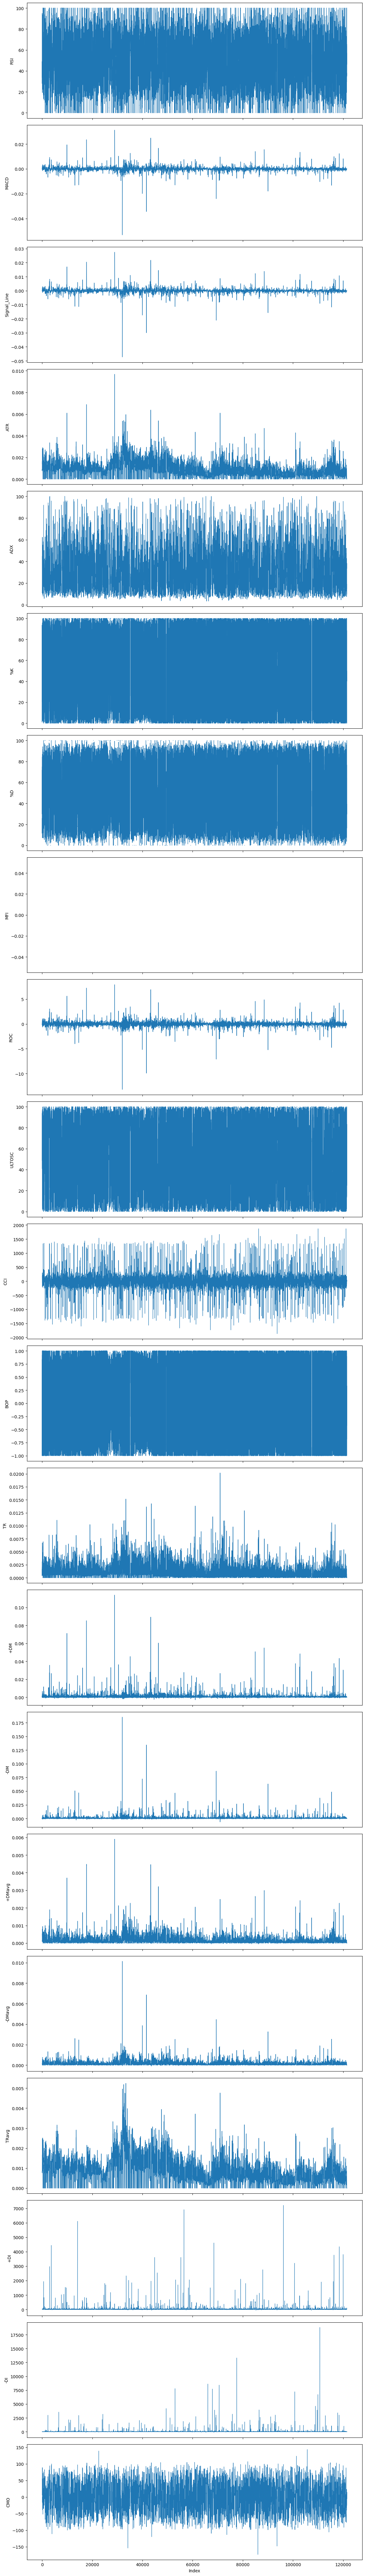

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/m30-11/M30_10.csv', sep=',')

# Select the features to plot
features_to_plot = ['RSI', 'MACD', 'Signal_Line', 'ATR', 'ADX', '%K', '%D', 'MFI', 'ROC', 'ULTOSC', 'CCI', 'BOP', 'TR', '+DM', '-DM', '+DMavg', '-DMavg', 'TRavg', '+DI', '-DI', 'CMO']

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data.index, data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Index')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/mn1-01/Mn1_with_dates_and_split.csv')

# Remove the 'time' column
data = data.drop(columns=['time'])

# Save the modified dataset
data.to_csv('/kaggle/working/Mn1_02.csv', index=False)


In [32]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/mn-033/Mn1_02.csv')

# Convert 'date' to datetime 
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')

# Create separate 'year', 'month', and 'day' columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original 'date' column
data.drop('date', axis=1, inplace=True)

# Save the modified dataset to a new file
data.to_csv('/kaggle/working/Mn1_03.csv', index=False)

# Display the modified dataset
print(data)


        open     high      low    close        volume  year  month  day
0    1.17800  1.19263  1.13964  1.15196  2.756496e+07  2003      1    6
1    1.15201  1.16069  1.11113  1.12363  3.001306e+07  2003      1    7
2    1.12350  1.14250  1.07911  1.09887  2.818087e+07  2003      1    8
3    1.09882  1.17323  1.07606  1.16738  2.960447e+07  2003      1    9
4    1.16710  1.18588  1.15309  1.15851  3.088754e+07  2003      1   10
..       ...      ...      ...      ...           ...   ...    ...  ...
160  1.15735  1.16921  1.15242  1.15562  1.647484e+06  2021      1   10
161  1.15562  1.16164  1.11859  1.13299  1.995959e+06  2021      1   11
162  1.13298  1.13863  1.12215  1.13667  1.825829e+06  2021      1   12
163  1.07026  1.09293  1.04823  1.08606  7.957592e+06  2023      1    1
164  1.08386  1.10952  1.07882  1.10105  6.290790e+06  2023      1    4

[165 rows x 8 columns]


/tmp/ipykernel_32/3531650075.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/mn1-04/Mn1_03.csv', sep=',')

# Define time intervals (3 months, 6 months, 9 months)
intervals = [3, 6, 9]  

for interval in intervals:
    # Calculate the price change for the given time interval
    data[f'{interval}mo_price_change'] = data['close'].shift(-interval * 20) - data['close']

    # Calculate labels for price direction (Up/Down)
    data[f'Label_{interval}mo'] = data[f'{interval}mo_price_change'].apply(lambda x: 'Up' if x > 0 else 'Down')

    # Calculate volatility high and low for the given time interval
    data[f'Volatility_High_{interval}mo'] = (data['high'].rolling(interval * 20).max() - data['close']).round(5)
    data[f'Volatility_Low_{interval}mo'] = (data['close'] - data['low'].rolling(interval * 20).min()).round(5)

    # Calculate trend duration for the given time interval
    data[f'Trend_Duration_{interval}mo'] = (data[f'Label_{interval}mo'] != data[f'Label_{interval}mo'].shift()).astype(int).cumsum()

# Save the modified dataset with new features and labels
data.to_csv('/kaggle/working/Mn1_04.csv', index=False)


In [ ]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('/kaggle/input/mn1-05/Mn1_04.csv', sep=',')

# Calculate RSI (Relative Strength Index)
rsi_period = 14
delta = data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=rsi_period).mean()
avg_loss = loss.rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = (100 - (100 / (1 + rs))).round(5)

# Calculate MACD (Moving Average Convergence Divergence)
ema_12 = data['close'].ewm(span=12, adjust=False).mean()
ema_26 = data['close'].ewm(span=26, adjust=False).mean()
data['MACD'] = (ema_12 - ema_26).round(5)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean().round(5)

# Calculate ADX (Average Directional Index)
n = 14
tr = pd.DataFrame()
tr['hl'] = (data['high'] - data['low']).round(5)
tr['hpc'] = ((data['high'] - data['close'].shift(1)).clip(lower=0)).round(5)
tr['lpc'] = ((data['low'] - data['close'].shift(1)).clip(lower=0)).round(5)

tr['tr'] = (tr[['hl', 'hpc', 'lpc']].max(axis=1)).round(5)
atr = (tr['tr'].rolling(n).mean()).round(5)
data['ATR'] = atr

up = (data['high'] - data['high'].shift(1)).round(5)
down = (data['low'] - data['low'].shift(1)).round(5)

pos_dm = (up > down) & (up > 0)
neg_dm = (down > up) & (down > 0)
pos_dm = (pos_dm * up).round(5)
neg_dm = (neg_dm * down).round(5)
avg_pos_dm = (pos_dm.rolling(n).mean()).round(5)
avg_neg_dm = (neg_dm.rolling(n).mean()).round(5)
pos_di = (avg_pos_dm / atr * 100).round(5)
neg_di = (avg_neg_dm / atr * 100).round(5)
data['ADX'] = ((pos_di - neg_di).abs() / (pos_di + neg_di).abs()).rolling(n).mean() * 100
data['ADX'] = data['ADX'].round(5)

# Calculate Stochastic Oscillator
k_period = 5
d_period = 3
min_low = (data['low'].rolling(k_period).min()).round(5)
max_high = (data['high'].rolling(k_period).max()).round(5)
data['%K'] = (100 * (data['close'] - min_low) / (max_high - min_low)).round(5)
data['%D'] = (data['%K'].rolling(d_period).mean()).round(5)

# Calculate MFI (Money Flow Index)
mfi_period = 14
typical_price = ((data['high'] + data['low'] + data['close']) / 3).round(5)
raw_money_flow = (typical_price * data['volume']).round(5)
money_flow_ratio = ((raw_money_flow.where(data['close'] > data['close'].shift(1)).rolling(mfi_period).sum()) / (raw_money_flow.where(data['close'] < data['close'].shift(1)).rolling(mfi_period).sum())).round(5)
data['MFI'] = (100 - (100 / (1 + money_flow_ratio))).round(5)

# Calculate ROC (Rate of Change)
roc_period = 12
data['ROC'] = (100 * (data['close'] - data['close'].shift(roc_period)) / data['close'].shift(roc_period)).round(5)

# Calculate Ultimate Oscillator (ULTOSC)
period1 = 7
period2 = 14
period3 = 28
avg1 = (data['close'].rolling(window=period1).mean()).round(5)
avg2 = (data['close'].rolling(window=period2).mean()).round(5)
avg3 = (data['close'].rolling(window=period3).mean()).round(5)
bp = (data['close'] - data['low'].rolling(window=period1).min()).round(5)
tr = (data['high'].rolling(window=period1).max() - data['low'].rolling(window=period1).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period2).min()).round(5)
tr += (data['high'].rolling(window=period2).max() - data['low'].rolling(window=period2).min()).round(5)
bp += (data['close'] - data['low'].rolling(window=period3).min()).round(5)
tr += (data['high'].rolling(window=period3).max() - data['low'].rolling(window=period3).min()).round(5)
avg_bp = (bp / 3).round(5)
avg_tr = (tr / 3).round(5)
ultosc = (100 * (avg_bp / avg_tr)).round(5)
data['ULTOSC'] = ultosc.round(5)

# Calculate CCI (Commodity Channel Index)
cci_period = 20
tp = ((data['high'] + data['low'] + data['close']) / 3).round(5)
sma = (tp.rolling(cci_period).mean()).round(5)
mean_deviation = ((tp - sma).abs().rolling(cci_period).mean()).round(5)
data['CCI'] = ((tp - sma) / (0.015 * mean_deviation)).round(5)

# Calculate BOP (Balance of Power)
bop = (((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low'])).round(5)
data['BOP'] = bop.round(5)

# Calculate CMO (Chande Momentum Oscillator)
cmo_period = 14
sum_period = 20
data['TR'] = (data['high'] - data['low']).round(5)
data['+DM'] = ((data['high'] - data['high'].shift(1)).where((data['high'] - data['high'].shift(1) > data['low'].shift(1) - data['low']), 0)).round(5)
data['-DM'] = ((data['low'].shift(1) - data['low']).where((data['low'].shift(1) - data['low'] > data['high'] - data['high'].shift(1)), 0)).round(5)
data['+DMavg'] = (data['+DM'].rolling(sum_period).mean()).round(5)
data['-DMavg'] = (data['-DM'].rolling(sum_period).mean()).round(5)
data['TRavg'] = (data['TR'].rolling(sum_period).mean()).round(5)
data['+DI'] = (100 * (data['+DMavg'] / data['TRavg'])).round(5)
data['-DI'] = (100 * (data['-DMavg'] / data['TRavg'])).round(5)
data['CMO'] = (100 * ((data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])).rolling(cmo_period).mean()).round(5)

# Define time intervals
intervals = [15, 30, 60, 240, 480]

# Calculate volatility high and low for each time interval
for interval in intervals:
    data[f'Volatility_High_{interval}min'] = (data['high'].rolling(interval).max() - data['close']).round(5)
    data[f'Volatility_Low_{interval}min'] = (data['close'] - data['low'].rolling(interval).min()).round(5)

# Save the modified dataset with new features and labels to the specified path
data.to_csv('/kaggle/working/Mn1_06.csv', index=False)


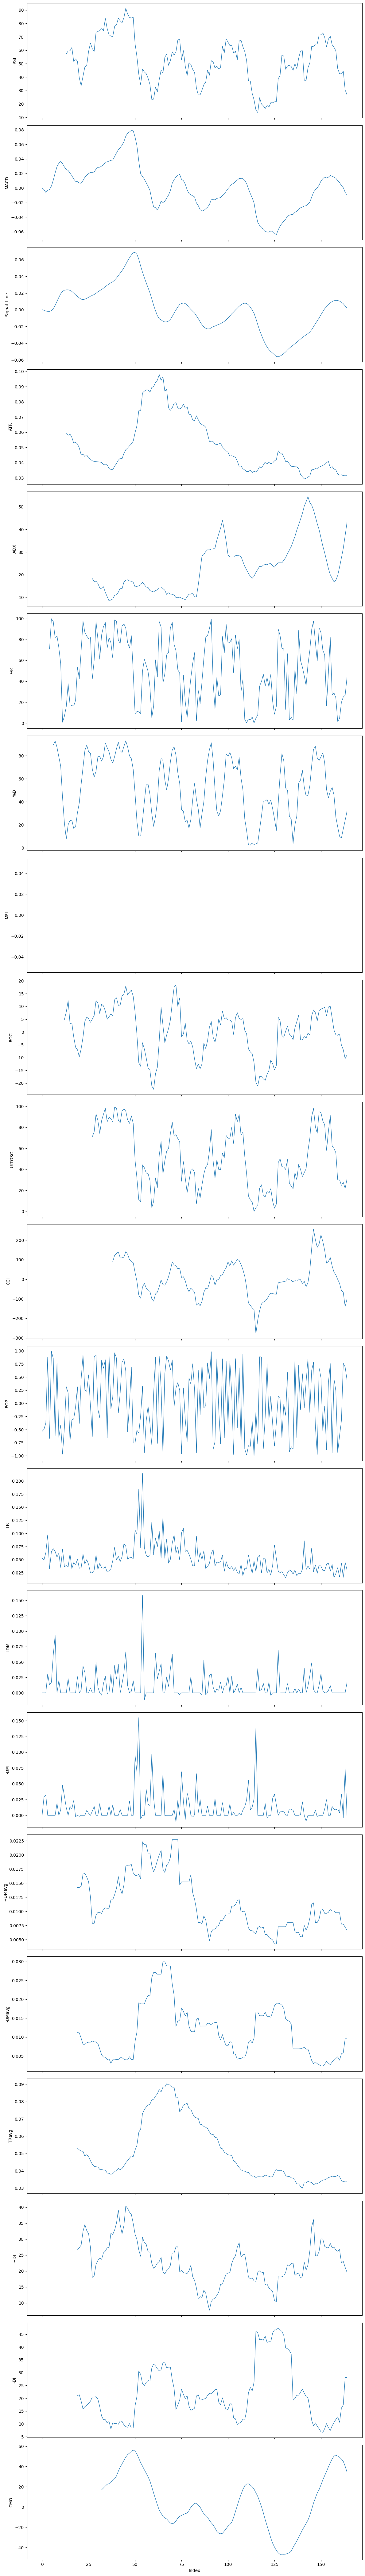

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/mn1-07/Mn1_06.csv', sep=',')

# Select the features to plot
features_to_plot = ['RSI', 'MACD', 'Signal_Line', 'ATR', 'ADX', '%K', '%D', 'MFI', 'ROC', 'ULTOSC', 'CCI', 'BOP', 'TR', '+DM', '-DM', '+DMavg', '-DMavg', 'TRavg', '+DI', '-DI', 'CMO']

# Create subplots
nrows = len(features_to_plot)
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharex=True)

for i, feature in enumerate(features_to_plot):
    axes[i].plot(data.index, data[feature], label=feature, linewidth=1)
    axes[i].set_ylabel(feature)

plt.xlabel('Index')
plt.tight_layout()
plt.show()


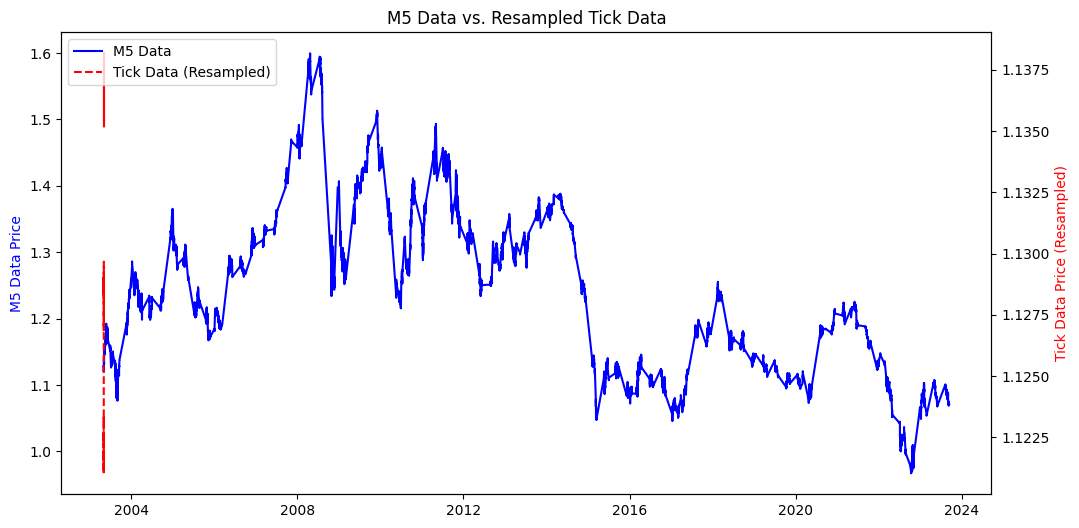

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the M5 dataset
m5_data = pd.read_csv('/kaggle/input/compare-tick-m5/M5_withdates.csv')

# Load the tick dataset
tick_data = pd.read_csv('/kaggle/input/compare-tick-m5/tick_with_dates_and_split.csv')

# Convert the 'date' and 'time' columns to a datetime column in both datasets
m5_data['datetime'] = pd.to_datetime(m5_data['date'] + ' ' + m5_data['time'])
tick_data['datetime'] = pd.to_datetime(tick_data['date'] + ' ' + tick_data['time'])

# Set the datetime column as the index
m5_data.set_index('datetime', inplace=True)
tick_data.set_index('datetime', inplace=True)

# Resample the tick data to 5-minute intervals and aggregate OHLC (Open, High, Low, Close)
resampled_tick_data = tick_data['askPrice'].resample('5T').ohlc()

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot the M5 data on the first y-axis
ax1.plot(m5_data.index, m5_data['close'], label='M5 Data', color='b')
ax1.set_ylabel('M5 Data Price', color='b')

# Plot the resampled tick data on the second y-axis
ax2.plot(resampled_tick_data.index, resampled_tick_data['close'], label='Tick Data (Resampled)', linestyle='--', color='r')
ax2.set_ylabel('Tick Data Price (Resampled)', color='r')

plt.title('M5 Data vs. Resampled Tick Data')
plt.xlabel('Time')

# Show a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


In [35]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/compare-tick-m5/tick_with_dates_and_split.csv')

# Convert 'date' to datetime with a flexible approach
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')

# Create separate 'year', 'month', and 'day' columns
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original 'date' column
data.drop('date', axis=1, inplace=True)

# Save the modified dataset to a new file
data.to_csv('/kaggle/working/Tick_02.csv', index=False)

# Display the modified dataset
print(data)


       askPrice  bidPrice  askVolume  bidVolume   time  year  month  day
0       1.12354   1.12284  43.500000  36.500000  21:00  2003      4    5
1       1.12326   1.12256  85.099998  10.300000  21:00  2003      4    5
2       1.12323   1.12313   0.600000  15.100000  21:00  2003      4    5
3       1.12304   1.12294  54.299999   8.800000  21:00  2003      4    5
4       1.12322   1.12312  84.300003   0.800000  21:00  2003      4    5
...         ...       ...        ...        ...    ...   ...    ...  ...
22507   1.13540   1.13526   1.600000  34.299999  15:59  2003      7    5
22508   1.13524   1.13510  11.700000  29.700001  15:59  2003      7    5
22509   1.13527   1.13513   4.000000  82.300003  15:59  2003      7    5
22510   1.13514   1.13504  51.599998   7.200000  15:59  2003      7    5
22511   1.13518   1.13508  44.700001  43.200001  15:59  2003      7    5

[22512 rows x 8 columns]


/tmp/ipykernel_32/1454160543.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, dayfirst=True, errors='coerce')


In [ ]:
import pandas as pd

# Load the tick data from your CSV file
data = pd.read_csv("/kaggle/input/tick-05/tick_04.csv", sep='\t')

# Convert the year, month, day, hour, and minute columns into a datetime column
data['timestamp'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute']])
data = data.drop(columns=['year', 'month', 'day', 'hour', 'minute'])

# Set the 'timestamp' column as the index
data.set_index('timestamp', inplace=True)

# Resample the data to calculate the 1-minute, 5-minute, and 15-minute aggregations
one_minute_data = data.resample('1T').agg({
    'askPrice': 'ohlc',
    'bidPrice': 'ohlc',
    'askVolume': 'sum',
    'bidVolume': 'sum',
})

five_minute_data = data.resample('5T').agg({
    'askPrice': 'ohlc',
    'bidPrice': 'ohlc',
    'askVolume': 'sum',
    'bidVolume': 'sum',
})

fifteen_minute_data = data.resample('15T').agg({
    'askPrice': 'ohlc',
    'bidPrice': 'ohlc',
    'askVolume': 'sum',
    'bidVolume': 'sum',
})

# Combine the aggregated data into a single DataFrame
aggregated_data = pd.concat([one_minute_data, five_minute_data, fifteen_minute_data], axis=1)

# Save the combined aggregated data to a single CSV file with a comma separator
aggregated_data.to_csv('combined_aggregations.csv', sep=',')


In [ ]:
import pandas as pd

# Load the data with tab separator
data = pd.read_csv("/kaggle/input/tick-05/tick_04.csv", sep='\t')



# Resample the data to calculate the 1-minute, 5-minute, and 15-minute aggregations
one_minute_data = data.resample('1T').agg({
    'askPrice': 'ohlc',
    'bidPrice': 'ohlc',
    'askVolume': 'sum',
    'bidVolume': 'sum',
})
print("1-minute aggregation done")

five_minute_data = data.resample('5T').agg({
    'askPrice': 'ohlc',
    'bidPrice': 'ohlc',
    'askVolume': 'sum',
    'bidVolume': 'sum',
})
print("5-minute aggregation done")

fifteen_minute_data = data.resample('15T').agg({
    'askPrice': 'ohlc',
    'bidPrice': 'ohlc',
    'askVolume': 'sum',
    'bidVolume': 'sum',
})
print("15-minute aggregation done")

# Save the results to new CSV files
one_minute_data.to_csv("1_minute_data.csv", sep='\t')
five_minute_data.to_csv("5_minute_data.csv", sep='\t')
fifteen_minute_data.to_csv("15_minute_data.csv", sep='\t')
